In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## TASK-A

DBSCAN clustering algorithm

In [138]:
df = pd.read_csv("DBSCAN_data_with_outliers.csv")
df.head(5)

,X1,X2
0,-0.677999,-0.698757
1,0.931437,0.191391
2,0.548291,-0.006017
3,0.872837,0.375023
4,0.435427,-0.294726


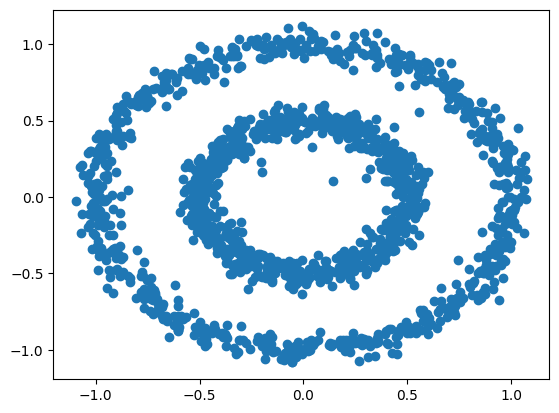

In [139]:
plt.scatter(df["X1"],df["X2"])

In [140]:
#converting given dataframe to an array
df = df.to_numpy()

Data is already normalized => for easy calculation

In [141]:
#parameters
eps = 0.2
MinPts = 4
clusters = []
noise = []

In [142]:
#functions required for DBSCAN

def euclid_distance(point1,point2):
    return np.sqrt(np.sum(point1 - point2)**2)

def get_neighbours(data,point,eps):
    neighbours = [] #contains indices of all points in the neighbourhood
    for index,pair in enumerate(data):
        if euclid_distance(pair,point) < eps:
            neighbours.append(index)
    return neighbours

length of neighbours list >= 4 => core point

point without corepoint as neighbour => noise

iterating over each point in dataset,checking whether its neighbour i caluculated or not

In [151]:
def DBSCAN(data,eps,MinPts = 4):
    n = data.shape[0]
    num = 0
    cls = [-1]*n

    for i in range(n):
        num += 1
        if cls[i] == -1:
            neigh = get_neighbours(data,data[i],eps)
            if len(neigh) >= MinPts:
                cls[i] = num
                dr = neigh[:]
                for j in dr:
                    cls[j] = num
                    dr2 = get_neighbours(data,data[j],eps)
                    for k in dr2:
                        if k not in dr:
                            dr.append(k)
    return cls
    

In [155]:
clusters_01 = DBSCAN(df,eps = 0.1)
clusters_008 = DBSCAN(df,eps = 0.08)
clusters_012 = DBSCAN(df,eps = 0.12)
clusters_015 = DBSCAN(df,eps=0.15)
clusters_016 = DBSCAN(df,eps=0.16)

Clustering using K-means(using the Scikit-Learn library))

/home/guest/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<AxesSubplot: xlabel='X1', ylabel='X2'>

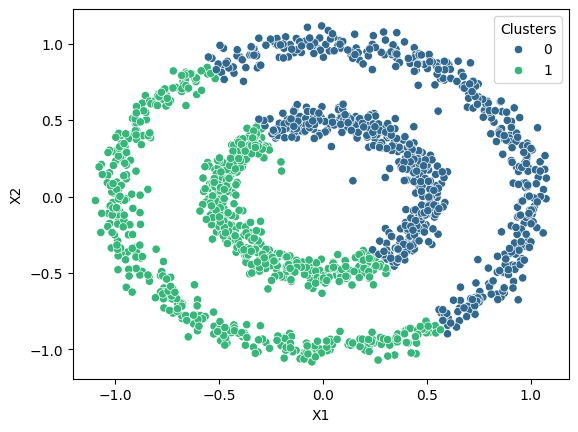

In [60]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster


df = pd.read_csv("DBSCAN_data_with_outliers.csv")
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df)
df['Clusters'] = km.labels_
sns.scatterplot(x="X1", y="X2",hue = 'Clusters',  data=df,palette='viridis')


## TASK-B

FINDING INFORMATION GAIN

In [3]:
data = pd.read_csv("DecisionTree_Fruits_data.csv")
data

,Color,Taste,Size,Season,Texture,Popularity
0,Red,Sweet,Small,Summer,Soft,Popular
1,Green,Sour,Large,Winter,Hard,Not popular
2,Yellow,Sweet,Large,Summer,Soft,Popular
3,Red,Bitter,Small,Winter,Hard,Not popular
4,Green,Sweet,Large,Summer,Soft,Popular
5,Red,Sweet,Small,Summer,Hard,Not popular
6,Yellow,Sour,Large,Winter,Soft,Not popular
7,Green,Sweet,Small,Spring,Soft,Popular
8,Red,Bitter,Large,Spring,Hard,Not popular
9,Yellow,Sweet,Small,Winter,Soft,Popular


Popularity is the target column
Informative gain -> for each attribute

In [103]:
attributes = []
for col in data.columns:
    attributes.append(col)

fields = attributes[:-1]
target = attributes[-1] 

In [109]:
output = [val for val in data[target].unique()]

In [107]:
columns = {}
for col in fields:
    columns[col] = []
    for value in data[col].unique():
        columns[col].append(value)
  

In [157]:
columns

{'Color': ['Red', 'Green', 'Yellow'],
 'Taste': ['Sweet', 'Sour', 'Bitter'],
 'Size': ['Small', 'Large'],
 'Season': ['Summer', 'Winter', 'Spring'],
 'Texture': ['Soft', 'Hard']}

In [134]:
types = []
type_count = {}
for out in output:
    type_count[out] = {}
    df_T = data[data[target] == out]
    types.append(df_T.shape[0])
    for attribute,values in columns.items():
        type_count[out][attribute] = []
        for value in values:
            temp_df = df_T[df_T[attribute] == value]
            type_count[out][attribute].append(temp_df.shape[0])

In [136]:
type_count

{'Popular': {'Color': [1, 2, 2],
  'Taste': [5, 0, 0],
  'Size': [3, 2],
  'Season': [3, 1, 1],
  'Texture': [5, 0]},
 'Not popular': {'Color': [3, 1, 1],
  'Taste': [1, 2, 2],
  'Size': [2, 3],
  'Season': [1, 3, 1],
  'Texture': [1, 4]}}

In [ ]:
def entropy_val(value,attribute):
    entropy = 0
    for val in type_count[]

def entropy_attr(value,attribute):



In [ ]:
entropy = {}
#attr = color
attribute = 'Color'
for val in columns[attribute]:
    
